# **Diplomado de Ciencia de Datos y Análisis Avanzado**
# **Unidad 5: Modelado Predictivo I**: Regresión y Clasificación

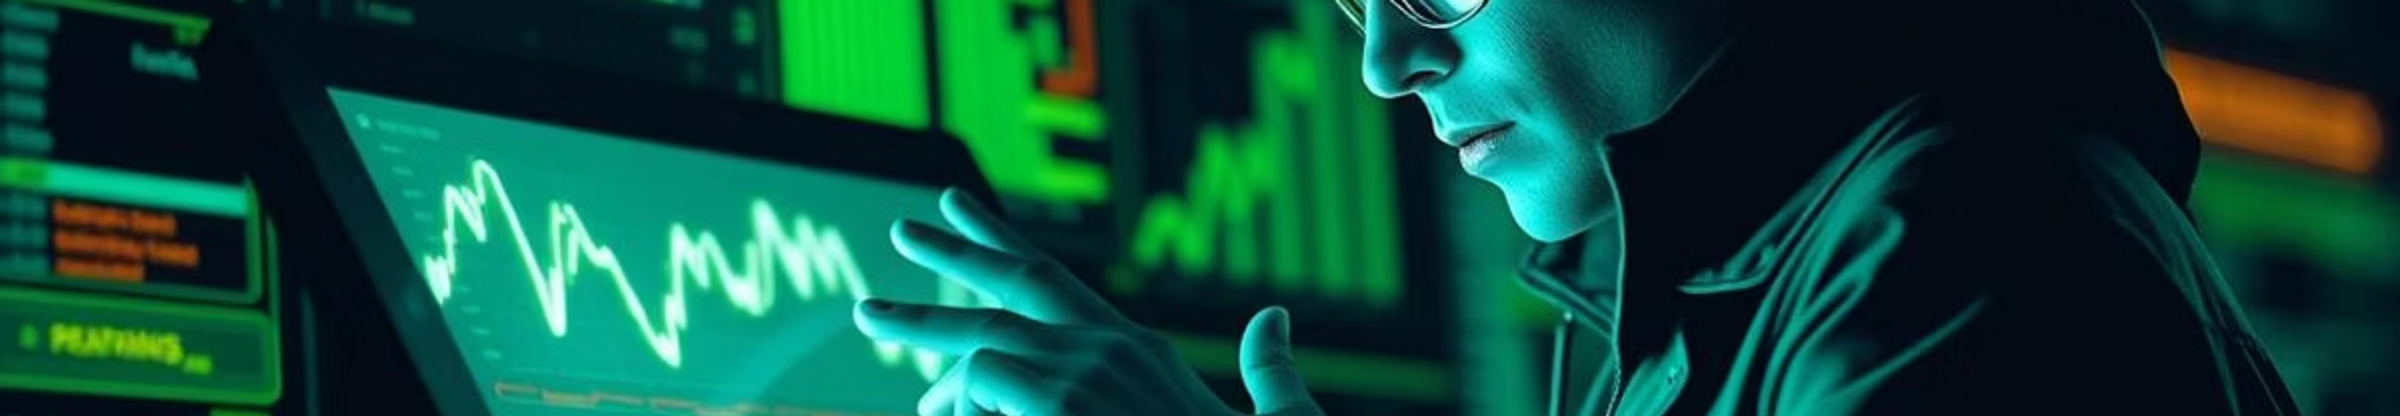

# **Métricas de Clasificación**

En el ámbito del Machine Learning, las métricas de clasificación son herramientas esenciales que nos permiten evaluar el rendimiento y la calidad de un modelo que ha sido entrenado para realizar tareas de clasificación. En otras palabras, nos dicen qué tan bien nuestro modelo predice la categoría o clase correcta para un determinado conjunto de datos.



# **¿Por qué son importantes las métricas de clasificación?**

+ **Cuantificar el rendimiento:** Nos dan números concretos para entender la efectividad de un modelo, en lugar de una simple percepción.

+ **Comparar modelos:** Permiten comparar objetivamente diferentes modelos o configuraciones de un mismo modelo para elegir el mejor.

+ **Identificar debilidades:** Revelan dónde el modelo podría estar fallando, por ejemplo, si es muy bueno detectando una clase pero muy malo con otra.

+ **Tomar decisiones de negocio:** En un contexto real, las métricas ayudan a decidir si un modelo es lo suficientemente bueno para ser implementado o si necesita más mejoras.

# **Conceptos Clave para entender las Métricas:**

Antes de sumergirnos en métricas específicas, es fundamental entender los cuatro resultados posibles de una predicción en un problema de clasificación binaria (dos clases, por ejemplo, "positivo" y "negativo"):

+ **Verdadero Positivo (VP):** El modelo predijo "positivo" y la clase real es "positivo". (Acierto)

+ **Verdadero Negativo (VN):** El modelo predijo "negativo" y la clase real es "negativo". (Acierto)

+ **Falso Positivo (FP):** El modelo predijo "positivo" y la clase real es "negativo". (Error de Tipo I - Alarmas falsas)

+ **Falso Negativo (FN):** El modelo predijo "negativo" y la clase real es "positivo". (Error de Tipo II - Omisiones)

# **Matriz de Confusión y Métricas**

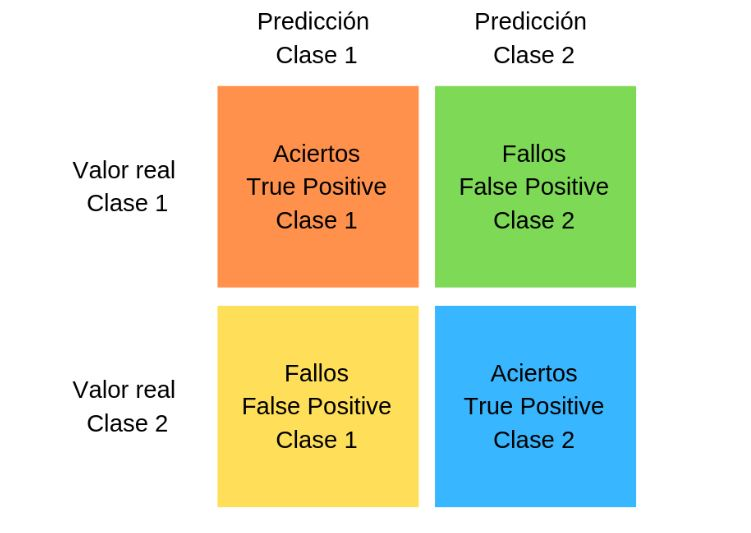

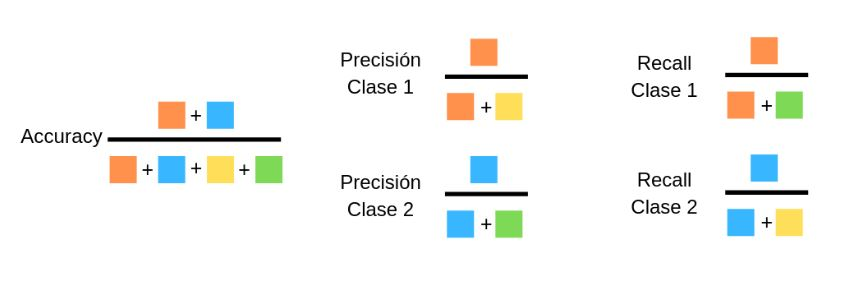

* La **Accuracy** del modelo es básicamente el numero total de predicciones correctas dividido por el número total de predicciones.

* La **Precisión** de una clase define cuan confiable es un modelo en responder si un punto pertenece a esa clase.

* El **Recall** de una clase expresa cuan bien puede el modelo detectar a esa clase.

* El **F1 Score** de una clase es dada por la media harmonía de precisión y recall $$\text{f1 score} = \frac{\text{2 x precision x recall}}{(\text{precision+recall})}$$ digamos que combina precisión y recall en una sola métrica.

Tenemos cuatro casos posibles para cada clase:

* **Alta precision y alto recall:** el modelo maneja perfectamente esa clase
* **Alta precision y bajo recall:** el modelo no detecta la clase muy bien, pero cuando lo hace es altamente confiable.
* **Baja precisión y alto recall:** La clase detecta bien la clase pero también incluye muestras de otras clases.
* **Baja precisión y bajo recall:** El modelo no logra clasificar la clase correctamente.

Cuando tenemos un dataset con desequilibrio, suele ocurrir que obtenemos un **alto valor de precisión en la clase Mayoritaria** y un **bajo recall en la clase Minoritaria**

## **Ejemplo**

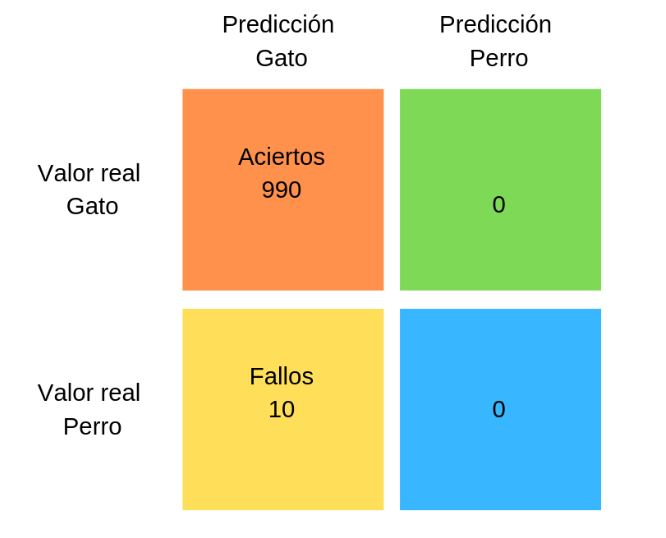

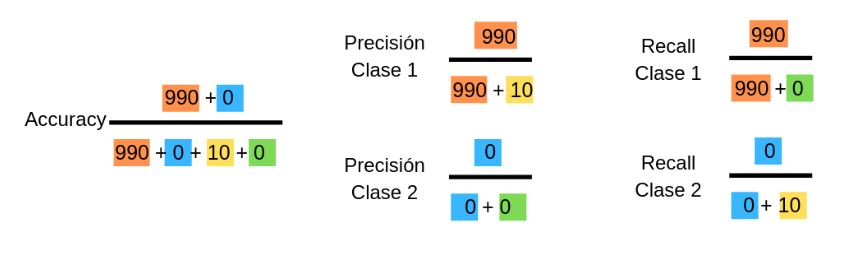

Tomado de https://www.aprendemachinelearning.com/

## **Curva ROC y AUC**

### **Curva ROC (Receiver Operating Characteristic Curve)**

La Curva ROC es una herramienta gráfica fundamental para evaluar el rendimiento de modelos de clasificación binaria. Muestra el compromiso (trade-off) entre dos métricas muy importantes a diferentes umbrales de clasificación:

+ **Tasa de Verdaderos Positivos (True Positive Rate - TPR)**, también conocida como Sensibilidad o Recall:

$$\text{TPR}= \frac{\text{VP}}{\text{VP}+\text{FN}}$$



  Esta métrica mide la proporción de casos positivos reales que fueron correctamente identificados por el modelo.

+ **Tasa de Falsos Positivos (False Positive Rate - FPR):**

$$\text{FPR}=\frac{FP}{FP+VN}$$

  Esta métrica mide la proporción de casos negativos reales que fueron incorrectamente identificados como positivos por el modelo.

**¿Cómo se construye?**

  La curva ROC se crea trazando la TPR en el eje Y versus la FPR en el eje X, para todos los posibles valores de umbral de clasificación del modelo. Cada punto en la curva ROC representa un par (FPR, TPR) obtenido al clasificar con un umbral particular.

  Un modelo perfecto tendría una curva que pasa por la esquina superior izquierda (0 FPR, 1 TPR), lo que significa que clasifica todos los positivos correctamente sin ningún falso positivo.

  Una línea diagonal de (0,0) a (1,1) representa un clasificador aleatorio (peor que el azar en la mayoría de los casos).

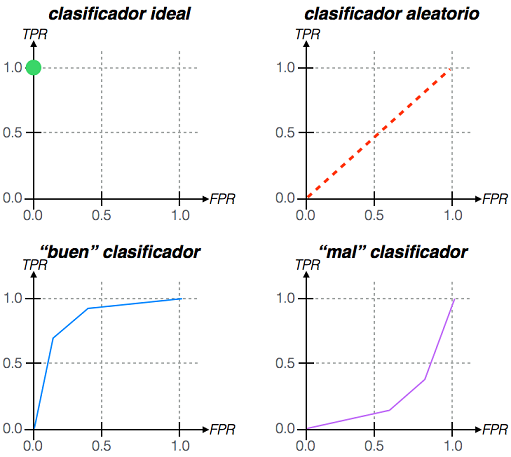

Fuente=https://codificandobits.com/tutorial/clasificacion-curva-roc-auc/

### **AUC (Area Under the Curve)**



El AUC es una métrica única que cuantifica el rendimiento general de un clasificador binario, resumiendo la Curva ROC en un solo número.

+ **Interpretación:** Representa la probabilidad de que el clasificador ordene aleatoriamente un ejemplo positivo mejor que un ejemplo negativo elegido aleatoriamente. En otras palabras, mide qué tan bien el modelo es capaz de distinguir entre las clases positivas y negativas.

+ **Rango de Valores**: El valor del AUC siempre está entre 0 y 1.

  + **AUC = 1:** Indica un clasificador perfecto.

  + **AUC = 0.5:** Indica un clasificador que no es mejor que adivinar al azar.

  + **AUC < 0.5**: Sugiere que el modelo está funcionando peor que el azar, lo que podría indicar un problema fundamental o una inversión de la interpretación de las clases.

**Ventajas del AUC:**

+ **Insensible al desbalance de clases:** A diferencia de métricas como la precisión (accuracy), el AUC no se ve afectado por la proporción de clases positivas y negativas en el dataset.

+ **Evalúa la capacidad de discriminación:** Mide qué tan bien el modelo discrimina entre las clases, independientemente del umbral de clasificación elegido.

+ **Útil para comparar modelos:** Permite comparar fácilmente el rendimiento general de diferentes modelos de clasificación.

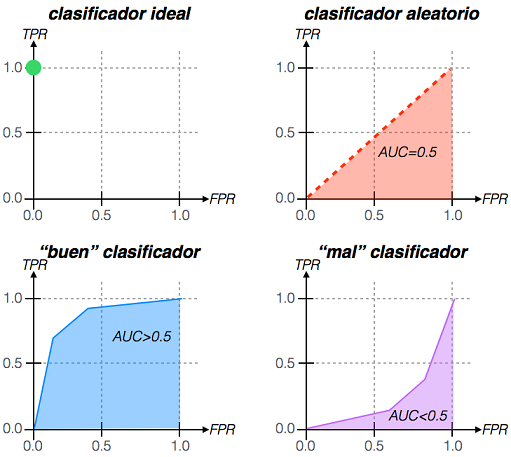

Fuente: https://codificandobits.com/tutorial/clasificacion-curva-roc-auc/

## **Clases Desbalanceadas**

En machine learning, decimos que los datos de un modelo están desbalanceados (o que hay un desequilibrio de clases) cuando la distribución de las muestras entre las diferentes clases de la variable objetivo (la que queremos predecir) es significativamente desigual.

Esto es un problema común, especialmente en tareas de clasificación, donde una o más clases tienen un número mucho menor de ejemplos que otras.

# **Criterios y señales para considerar los datos desbalanceados**

No hay una regla estricta y universal que defina un "umbral" exacto para el desbalanceo, ya que depende mucho del problema y del dominio. Sin embargo, hay criterios y señales claras que puedes usar:

1. **Proporción de la Clase Minoritaria:**

  + **Regla general**: Si la clase minoritaria representa menos del 20-30% del conjunto de datos, se suele considerar que hay un desbalance significativo.

  * **Grados de desequilibrio:**

    + **Leve:** Entre 20% y 40% de la clase minoritaria.

    + **Moderado:** Entre 1% y 20% de la clase minoritaria.

    + **Extremo:** Menos del 1% de la clase minoritaria.

    + **Ejemplos comunes:**

      + **Detección de fraude:** Transacciones fraudulentas (minoritaria) vs. transacciones normales (mayoritaria). La proporción puede ser 1:1000 o incluso más extrema.

      + **Detección de enfermedades raras:** Pacientes enfermos (minoritaria) vs. pacientes sanos (mayoritaria).

      + **Predicción de abandono (churn):** Clientes que abandonan (minoritaria) vs. clientes que permanecen (mayoritaria). La proporción puede ser del 5-15% para la clase minoritaria.

2. **Impacto en el Rendimiento del Modelo (y las métricas):**

  El principal indicio de que el desbalanceo es un problema es cuando tu modelo, entrenado con datos desbalanceados, muestra un rendimiento engañosamente bueno o malo, especialmente si usas métricas inapropiadas.

    + **Alta Accuracy (Exactitud) Engañosa:** Si tienes un 99% de la clase mayoritaria y tu modelo simplemente predice siempre la clase mayoritaria, obtendría un 99% de accuracy. Esto parece excelente, pero el modelo es inútil para predecir la clase minoritaria, que es la que a menudo nos interesa.

    + **Métricas inadecuadas:** La accuracy es una métrica pobre para datos desbalanceados. Debes usar métricas que evalúen el rendimiento en la clase minoritaria:

    + **Precision (Precisión):** De todas las predicciones positivas, ¿cuántas fueron realmente positivas?

    + **Recall (Sensibilidad o Exhaustividad):** De todas las instancias positivas reales, ¿cuántas fueron correctamente identificadas? (Esta es crucial para la clase minoritaria, ya que un bajo recall significa que el modelo no detecta bien los casos importantes).

    + **F1-Score:** La media armónica de precisión y recall. Es una buena métrica única para resumir el rendimiento en casos desbalanceados.

    + **Curva ROC y AUC (Area Under the Curve):** Ofrecen una visión más completa del rendimiento del clasificador a través de diferentes umbrales de clasificación.

    + **Matriz de Confusión:** Es fundamental para visualizar cuántos falsos positivos y falsos negativos estás obteniendo, especialmente para la clase minoritaria. Un alto número de falsos negativos para la clase minoritaria es una señal clara de desbalance.

3. **Visualización de Datos:**

  + **Histogramas o gráficos de barras:** Simplemente graficar la distribución de tus clases en la variable objetivo te mostrará inmediatamente si hay una gran disparidad en el número de muestras. Si una barra es minúscula en comparación con otra, tienes un desbalance.

# **¿Cómo Manejar Datos Desbalanceados?**

1. **Ajuste de Parámetros del modelo:** Consiste en ajustar parametros ó metricas del propio algoritmo para intentar equilibrar a la clase minoritaria penalizando a la clase mayoritaria durante el entrenamiento. Ejemplos on ajuste de peso en árboles, también en logisticregression tenemos el parámetro class_weight= “balanced”. No todos los algoritmos tienen estas posibilidades. En redes neuronales por ejemplo podríamos ajustar la métrica de Loss para que penalice a las clases mayoritarias.

2. **Modificar el Dataset:** Podemos eliminar muestras de la clase mayoritaria para reducirlo e intentar equilibrar la situación. Tiene como “peligroso” que podemos prescindir de muestras importantes, que brindan información y por lo tanto empeorar el modelo. Entonces para seleccionar qué muestras eliminar, deberíamos seguir algún criterio. También podríamos agregar nuevas filas con los mismos valores de las clases minoritarias, por ejemplo cuadriplicar nuestras filas. Pero esto no sirve demasiado y podemos llevar al modelo a caer en overfitting.

3. **Muestras artificiales:** Podemos intentar crear muestras sintéticas (no idénticas) utilizando diversos algoritmos que intentan seguir la tendencia del grupo minoritario. Según el método, podemos mejorar los resultados. Lo peligroso de crear muestras sintéticas es que podemos alterar la distribución “natural” de esa clase y confundir al modelo en su clasificación.

4. **Balanced Ensemble Methods:** Utiliza las ventajas de hacer ensamble de métodos, es decir, entrenar diversos modelos y entre todos obtener el resultado final (por ejemplo “votando”) pero se asegura de tomar muestras de entrenamiento equilibradas.

# **Manejo de Datos Desbalanceados con Sklearn**

Para manejar datos desbalanceados en scikit-learn, existen varias técnicas que se pueden clasificar en diferentes categorías. Es importante destacar que, si bien scikit-learn ofrece algunas funcionalidades directamente, la biblioteca **imbalanced-learn** (una extensión de scikit-learn) es fundamental y proporciona la mayoría de las herramientas avanzadas para este propósito.

Aquí te presento las principales técnicas:

1. **Ajuste de pesos de clase (Class Weighting)**
Muchos algoritmos de clasificación en scikit-learn tienen un parámetro class_weight que permite asignar diferentes pesos a las clases. Esto hace que el modelo preste más atención a la clase minoritaria durante el entrenamiento, penalizando más los errores de clasificación en esa clase.

  + **Cómo usarlo:** Simplemente establece class_weight='balanced' en el constructor del modelo. Esto ajusta automáticamente los pesos de las clases inversamente proporcionales a sus frecuencias en los datos de entrenamiento. También puedes pasar un diccionario con pesos personalizados.

  + **Modelos comunes con class_weight:**

    + LogisticRegression

    + SVC (Support Vector Classifier)

    + DecisionTreeClassifier

    + RandomForestClassifier
    
    + Entre otros



## **Ejemplo**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Con class_weight='balanced'
model_lr = LogisticRegression(class_weight='balanced', random_state=42)

2. **Técnicas de remuestreo (Resampling Techniques)**
Estas técnicas modifican la distribución de las clases en el conjunto de datos de entrenamiento para equilibrarlas. Se dividen en dos categorías principales:

  **a) Sobremuestreo (Oversampling) de la clase minoritaria**
    
    Aumenta el número de instancias de la clase minoritaria.

    + **RandomOverSampler (de imbalanced-learn):** Duplica aleatoriamente las muestras existentes de la clase minoritaria. Es simple pero puede llevar a sobreajuste.

    + **SMOTE (Synthetic Minority Over-sampling Technique) (de imbalanced-learn):** Genera nuevas muestras sintéticas para la clase minoritaria. En lugar de simplemente duplicar, SMOTE crea nuevas instancias interpolando entre las muestras existentes y sus vecinos más cercanos. Esto reduce el riesgo de sobreajuste en comparación con el sobremuestreo aleatorio.

    Existen variantes de SMOTE como BorderlineSMOTE, SVMSMOTE, ADASYN, etc., que se enfocan en generar muestras en regiones más difíciles de clasificar.

**Ejemplo con imbalanced-learn (requiere instalación: pip install imbalanced-learn):**

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

# Generar un dataset desbalanceado de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, weights=[0.9, 0.1],
                           flip_y=0, random_state=42)

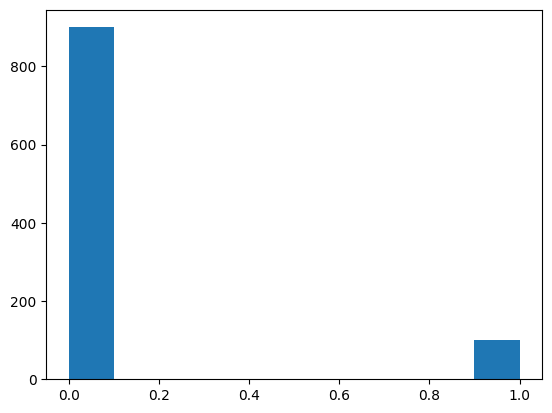

In [ ]:
plt.hist(y)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Aplicar RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

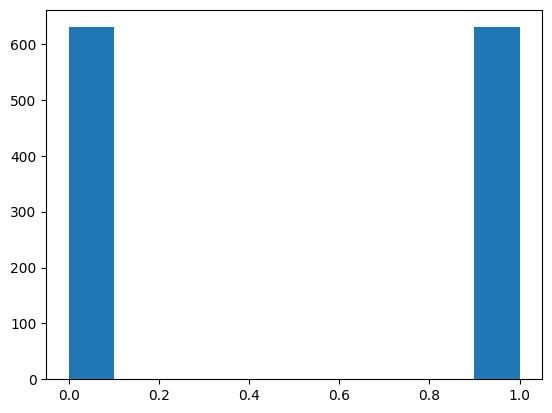

In [ ]:
plt.hist(y_resampled_smote)
plt.show()

  b**) Submuestreo (Undersampling) de la clase mayoritaria**
  
  Reduce el número de instancias de la clase mayoritaria.

  + **RandomUnderSampler (de imbalanced-learn):** Elimina aleatoriamente muestras de la clase mayoritaria. Puede llevar a la pérdida de información valiosa.

  + **NearMiss (de imbalanced-learn):** Selecciona muestras de la clase mayoritaria basándose en la distancia a las muestras de la clase minoritaria, intentando mantener la información relevante.

  + **ClusterCentroids (de imbalanced-learn):** Reduce el número de muestras de la clase mayoritaria reemplazándolas por los centroides de clusters (por ejemplo, usando K-Means).

## **Ejemplo**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Aplicar RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)

# Aplicar NearMiss
nm = NearMiss(version=1) # Puedes probar diferentes versiones (1, 2, 3)
X_resampled_nm, y_resampled_nm = nm.fit_resample(X_train, y_train)

  **c) Estratificación en la división de datos**

  Aunque no es una técnica para "manejar" el desbalance en sí, es crucial para asegurar que el desbalance se mantenga proporcionalmente en los conjuntos de entrenamiento y prueba.

  + **train_test_split con stratify=y:** Al dividir tus datos en conjuntos de entrenamiento y prueba, usa el parámetro stratify=y para que la proporción de clases sea la misma en ambos conjuntos. Esto evita que una clase minoritaria quede subrepresentada o ausente en el conjunto de entrenamiento o prueba.

# **Ejemplo**

In [ ]:
from sklearn.model_selection import train_test_split
# ... (X, y definidos como antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **Consideraciones Importantes**

+ **Aplicar solo al conjunto de entrenamiento:** Las técnicas de remuestreo
(sobremuestreo y submuestreo) siempre deben aplicarse solo al conjunto de entrenamiento. Nunca las apliques al conjunto de prueba, ya que esto resultaría en "fugas de datos" (data leakage) y una evaluación irreal del rendimiento de tu modelo.

+ **Métricas de evaluación:** La accuracy (exactitud) no es una métrica adecuada para datos desbalanceados. Utiliza métricas como:

  + **Precisión (Precision):** Proporción de verdaderos positivos entre todos los positivos predichos.

  + **Exhaustividad (Recall / Sensibilidad):** Proporción de verdaderos positivos entre todos los positivos reales.

  + **F1-score:** Media armónica de precisión y exhaustividad.

  + **Curva ROC y AUC:** Como explicamos antes, el AUC es una métrica robusta e independiente del umbral.

  + **Matriz de confusión:** Para entender los tipos de errores (falsos positivos y falsos negativos).

+ **Experimentación:** No hay una técnica única que funcione mejor para todos los problemas. Es fundamental experimentar con diferentes enfoques y combinaciones para encontrar la que mejor se adapte a tu conjunto de datos y al problema específico.